# Deep-Learning--Artificial-Neural-Networks

In [1]:
#pip install tensorflow

### Deep Neural Networks Classification

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#z-score = Scale or normalization

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
import tensorflow as tf

In [8]:
# Tensor = çok boyutlu matrix

In [9]:
# Sequential =Sequential sınıfı, ardışık bir model oluşturmaya yarar.
# Bu tür modellerde, katmanlar sırayla birbirinin üzerine eklenir,
# yani her katman bir öncekinden veri alır ve bir sonrakine verir.

# Dense = Dense katmanı, tam bağlı (fully connected) bir katmandır.
# Yani bu katmandaki her bir nöron, bir önceki katmandaki tüm nöronlarla bağlantılıdır.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
x = df.drop("Outcome", axis=1)
y = df[["Outcome"]]

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

In [13]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [15]:
model = Sequential()


# ilk layeri ekle
# activation = weight vb. dataya bakarak verinin geçip geçmeyeceği
model.add(Dense(120,activation='relu')) # input
model.add(Dense(80,activation='relu')) # hiddens
model.add(Dense(64,activation='relu')) # hiddens
model.add(Dense(30,activation='relu')) # hiddens
model.add(Dense(20,activation='relu')) # hiddens
model.add(Dense(4,activation='relu')) # hiddens
model.add(Dense(1,activation='sigmoid')) # output - cevabı evet hayır olduğu için sigmoid'e döndük
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # araştır

In [16]:
df.shape

(768, 9)

In [17]:
from sklearn.preprocessing import normalize, scale

In [18]:
x = scale(x)

In [19]:
# epochs = Tekrar sayısı, batch_size= Bir seferde kaç satır alacağı 768/32 = 24
# verbose = 1 sonucu göster
history = model.fit(x,y,epochs=250,batch_size=32,validation_split=.2,verbose=1) 

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6665 - loss: 0.6813 - val_accuracy: 0.6429 - val_loss: 0.6316
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6413 - loss: 0.5900 - val_accuracy: 0.6494 - val_loss: 0.5389
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7133 - loss: 0.5201 - val_accuracy: 0.7532 - val_loss: 0.5152
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8005 - loss: 0.5006 - val_accuracy: 0.7532 - val_loss: 0.5163
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7833 - loss: 0.4587 - val_accuracy: 0.7662 - val_loss: 0.4845
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8213 - loss: 0.4371 - val_accuracy: 0.7662 - val_loss: 0.4852
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7947 - loss: 0.4349 - val_accuracy: 0.7792 - val_loss: 0.4766
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7900 - loss: 0.4368 - val_accuracy: 0

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,811 (218.02 KB)

 Trainable params: 18,603 (72.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,208 (145.35 KB)

In [21]:
import matplotlib.pyplot as plt

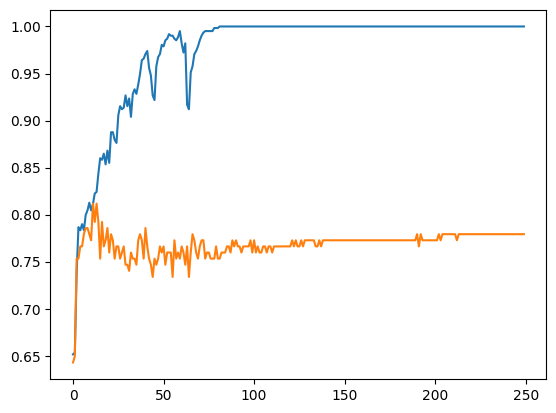

In [22]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [1]:
# DNN - Deep Neural Network Regression

In [24]:
import pandas as pd

In [29]:
df = pd.read_pickle("kc_house.pkl")

In [30]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x=df.drop("price", axis=1)
y=df[["price"]]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=.2,random_state=42)

In [36]:
model = Sequential()

# ilk layeri ekle
# activation = weight vb. dataya bakarak verinin geçip geçmeyeceği
model.add(Dense(120,activation='relu')) # input
model.add(Dense(80,activation='relu')) # hiddens
model.add(Dense(64,activation='relu')) # hiddens
model.add(Dense(30,activation='relu')) # hiddens
model.add(Dense(20,activation='relu')) # hiddens
model.add(Dense(4,activation='relu')) # hiddens
model.add(Dense(1)) # output - cevabı evet hayır olduğu için sigmoid'e döndük
model.compile(loss='mse', optimizer='adam') # araştır

In [37]:
history2 = model.fit(x_train,y_train, validation_data = (x_test, y_test), batch_size=128,epochs=300)

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 215283875840.0000 - val_loss: 33114028032.0000
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 32623630336.0000 - val_loss: 32115828736.0000
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 31766265856.0000 - val_loss: 31145873408.0000
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 30413262848.0000 - val_loss: 30377871360.0000
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 29657585664.0000 - val_loss: 30144155648.0000
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28763238400.0000 - val_loss: 29445410816.0000
Epoch 7/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 28525944832.0000 - val_loss: 29136281600.0000
Epoch 8/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 29550448640.0000 - val_loss: 28929087488.0000
Epoch 9/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28265709568.0000 - val_loss: 28693104640.0000
Epoch 10/300
119/119 ━━━━━━━━━━━━━

In [39]:
tahmin = model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [38]:
from sklearn.metrics import r2_score, mean_squared_error 

In [40]:
r2_score(y_test,tahmin)**.5 # r2 her zaman doğruyu söylemez

0.9107725488100163

In [46]:
mean_squared_error(y_test,tahmin)**.5

93422.0339540071

In [41]:
loss_f = pd.DataFrame(history2.history)

<Axes: >

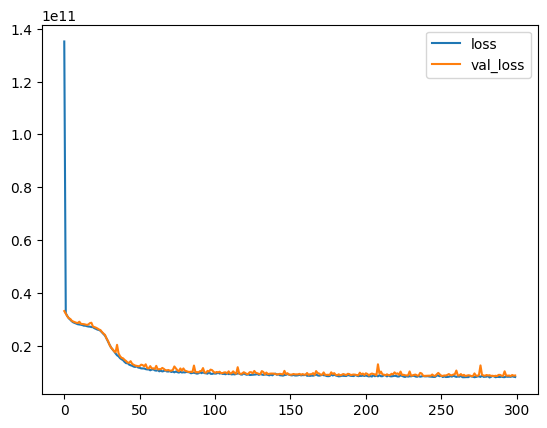

In [42]:
loss_f.plot()